In [ ]:
# Library installation commands
# !pip install pandas
# !pip install kaggle

In [1]:
import pandas as pd
import kaggle
import zipfile

In [ ]:
# kaggle api to download dataset
!kaggle datasets download -d saadharoon27/diwali-sales-dataset

In [ ]:
# to extract files from downloaded zip file
zipfile_name = 'diwali-sales-dataset.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [2]:
# to avoide encoding error use "encoding='unicode_escape'"
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

# to import file from different folder use below format
# df = pd.read_csv(r'C:\Data Analytics Projects\Python DA\P2\Diwali Sales Data.csv',encoding='unicode_escape')

# DATA CLEANING

In [3]:
# to get summary of data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB
None


In [4]:
# to rename a column
df.rename(columns = {'Age Group':'Age_Group'}, inplace = True)

In [5]:
# to get total number of rows and columns
print(df.shape)

(11251, 15)


In [6]:
# sample data from dataset
print(df.head())

   User_ID  Cust_name Product_ID Gender Age_Group  Age  Marital_Status   
0  1002903  Sanskriti  P00125942      F     26-35   28               0  \
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders   
0     Maharashtra   Western       Healthcare             Auto       1  \
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN     

In [7]:
# to find all unique values and their counts in a column
print(df.State.value_counts(),"\n")
print(df.Product_Category.value_counts(),"\n")
print(df.Age_Group.value_counts(),"\n")
print(df.Zone.value_counts(),"\n")
print(df.Occupation.value_counts(),"\n")
print(df.Gender.value_counts(),"\n")
print(df.Marital_Status.value_counts(),"\n")
print(df.Orders.value_counts(),"\n")

State
Uttar Pradesh       1946
Maharashtra         1526
Karnataka           1305
Delhi               1107
Madhya Pradesh       923
Andhra Pradesh       812
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              429
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: count, dtype: int64 

Product_Category
Clothing & Apparel       2655
Food                     2493
Electronics & Gadgets    2087
Footwear & Shoes         1064
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 353
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                      100
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: cou

In [8]:
# to remove unwanted columns
df.drop(['Status','unnamed1','User_ID','Cust_name','Product_ID'], axis=1, inplace=True)

In [9]:
# to check if columns contain null values
pd.isnull(df).sum()

Gender               0
Age_Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
# to drop null values
df.dropna(inplace=True)

In [11]:
# to change data type of a column
df['Amount'] = df['Amount'].astype('int32')

In [ ]:
# to export the cleaned dataset as csv file
df.to_excel('Cleaned_Diwali_Sale_Data.xlsx',sheet_name = 'Data')

In [12]:
# to get a statictical summary of dataset
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [13]:
# to replace values in a column
df.loc[df["Gender"] == "M", "Gender"] = "Male"
df.loc[df["Gender"] == "F", "Gender"] = "Female"
df.loc[df["Marital_Status"] == 1, "Marital_Status"] = "Single"
df.loc[df["Marital_Status"] == 0, "Marital_Status"] = "Married"
df

,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,Female,26-35,28,Married,Maharashtra,Western,Healthcare,Auto,1,23952
1,Female,26-35,35,Single,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,Female,26-35,35,Single,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,Male,0-17,16,Married,Karnataka,Southern,Construction,Auto,2,23912
4,Male,26-35,28,Single,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...
11246,Male,18-25,19,Single,Maharashtra,Western,Chemical,Office,4,370
11247,Male,26-35,33,Married,Haryana,Northern,Healthcare,Veterinary,3,367
11248,Female,36-45,40,Married,Madhya Pradesh,Central,Textile,Office,4,213
11249,Male,36-45,37,Married,Karnataka,Southern,Agriculture,Office,3,206


# DATA EXPLORATION

In [14]:
import matplotlib.pyplot as ptl
import numpy as np

Q - Find the amount of orders and the revenue generated as per gender ?

In [15]:
gender_revenue = df.groupby(['Gender'], as_index=False).agg({'Amount':'sum','Orders':'sum'}).sort_values(by = 'Amount',ascending=False)
gender_revenue

,Gender,Amount,Orders
0,Female,74335853,19548
1,Male,31913276,8433


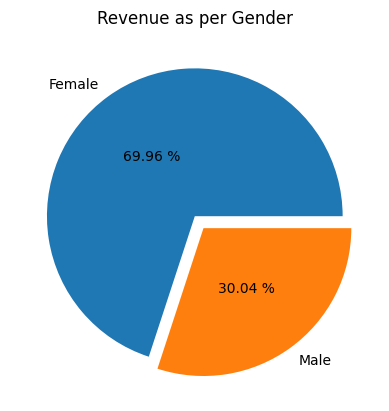

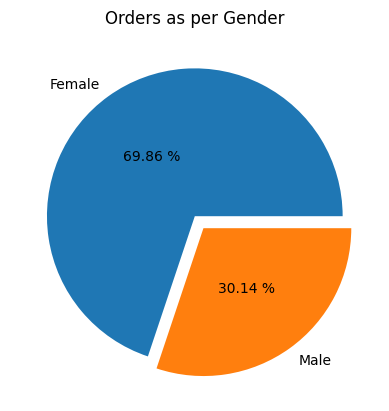

In [16]:
# Pie Chart for Revenue
ptl.title("Revenue as per Gender")
ptl.pie(gender_revenue['Amount'], labels=gender_revenue['Gender'], autopct='%.2f %%', explode=[0,0.1], pctdistance=0.5)
ptl.show()
# Pie Chart for Orders
ptl.title("Orders as per Gender")
ptl.pie(gender_revenue['Orders'], labels=gender_revenue['Gender'], autopct='%.2f %%', explode=[0,0.1], pctdistance=0.5)
ptl.show()

Q - Find the amount of orders and the revenue generated as per marital status ?

In [17]:
status_revenue = df.groupby(['Marital_Status'], as_index=False).agg({'Amount':'sum','Orders':'sum'})
status_revenue

,Marital_Status,Amount,Orders
0,Married,62125384,16249
1,Single,44123745,11732


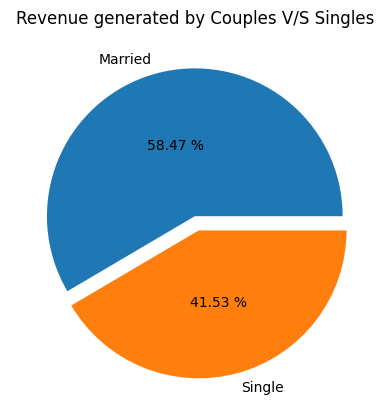

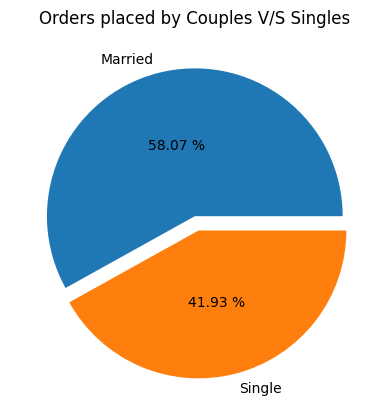

In [18]:
# Pie Chart for Revenue
ptl.title("Revenue generated by Couples V/S Singles")
ptl.pie(status_revenue['Amount'], labels=status_revenue['Marital_Status'], autopct='%.2f %%', explode=[0,0.1], pctdistance=0.5)
ptl.show()
# Pie Chart for Orders
ptl.title("Orders placed by Couples V/S Singles")
ptl.pie(status_revenue['Orders'], labels=status_revenue['Marital_Status'], autopct='%.2f %%', explode=[0,0.1], pctdistance=0.5)
ptl.show()

Q - Find the amount of orders and the revenue generated as per Zones ?

In [19]:
zone_revenue = df.groupby(['Zone'], as_index=False).agg({'Amount':'sum','Orders':'sum'})
zone_revenue

,Zone,Amount,Orders
0,Central,41600872,10623
1,Eastern,7049213,2015
2,Northern,12618752,3727
3,Southern,26606667,6740
4,Western,18373625,4876


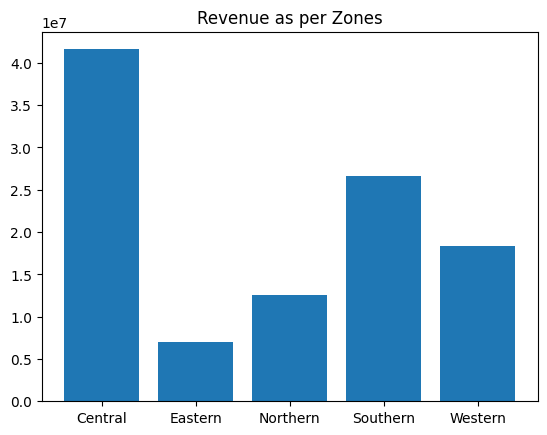

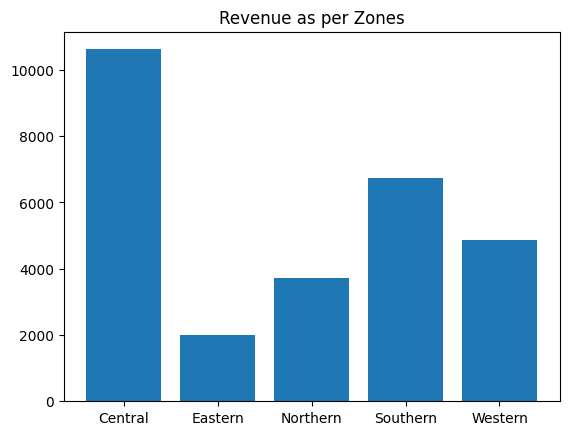

In [20]:
# Bar Chart for Revenue
ptl.title("Revenue as per Zones")
ptl.bar(zone_revenue['Zone'],zone_revenue['Amount'])
ptl.show()
# Bar Chart for Orders
ptl.title("Revenue as per Zones")
ptl.bar(zone_revenue['Zone'],zone_revenue['Orders'])
ptl.show()

Q - Find the amount of orders and the revenue generated as per Age ?

In [21]:
age_revenue = df.groupby(['Age_Group'], as_index=False).agg({'Amount':'sum','Age':'count','Orders':'sum'})
age_revenue

,Age_Group,Amount,Age,Orders
0,0-17,2699653,296,690
1,18-25,17240732,1879,4650
2,26-35,42613442,4541,11395
3,36-45,22144994,2283,5687
4,46-50,9207844,983,2371
5,51-55,8261477,830,2112
6,55+,4080987,427,1076


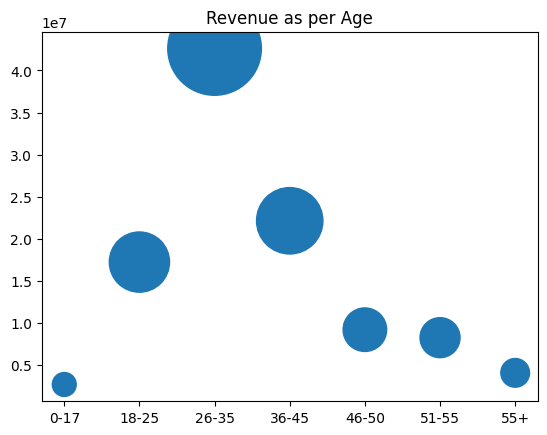

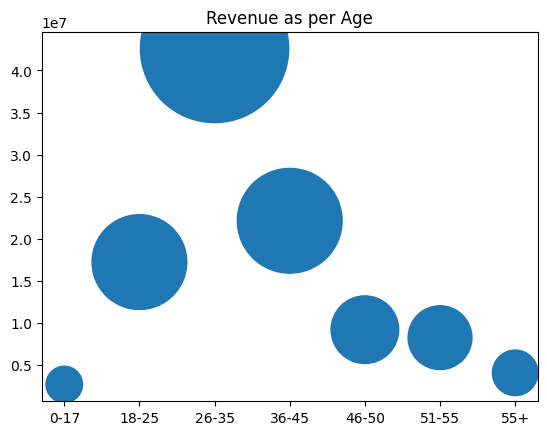

In [22]:
# Scatter Chart for Revenue
ptl.title("Revenue as per Age")
ptl.scatter(age_revenue['Age_Group'], age_revenue['Amount'],s=age_revenue['Age'])
ptl.show()
# Scatter Chart for Orders
ptl.title("Revenue as per Age")
ptl.scatter(age_revenue['Age_Group'], age_revenue['Amount'],s=age_revenue['Orders'])
ptl.show()

Q - Find the amount of orders and the revenue generated as per Product Category ?

In [23]:
product_revenue = df.groupby(['Product_Category'], as_index=False).agg({'Amount':'sum','Orders':'sum'})
product_revenue

,Product_Category,Amount,Orders
0,Auto,1958609,239
1,Beauty,1959484,1086
2,Books,1061478,245
3,Clothing & Apparel,16495019,6634
4,Decor,730360,235
5,Electronics & Gadgets,15643846,5226
6,Food,33933883,6110
7,Footwear & Shoes,15575209,2646
8,Furniture,5440051,889
9,Games & Toys,4331694,940


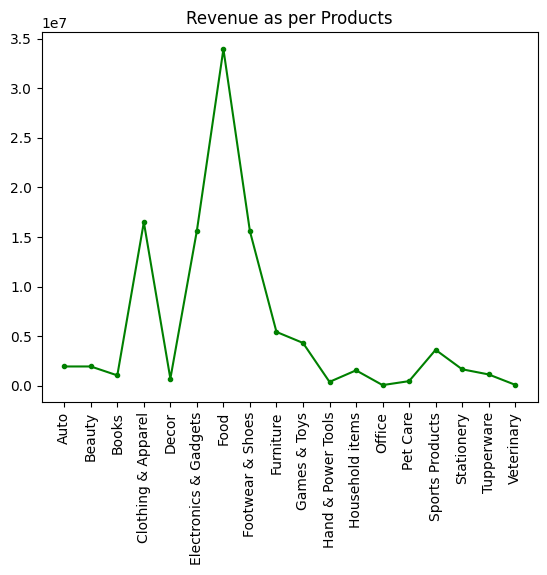

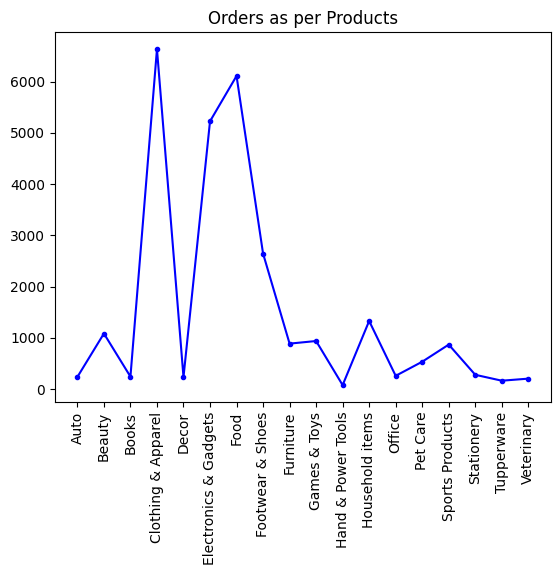

In [26]:
# Line Chart for Amount
ptl.title("Revenue as per Products")
ptl.plot(product_revenue['Product_Category'], product_revenue['Amount'],'g.-')
ptl.xticks(rotation = 90)
ptl.show()
# Line Chart for Orders
ptl.title("Orders as per Products")
ptl.plot(product_revenue['Product_Category'], product_revenue['Orders'],'b.-')
ptl.xticks(rotation = 90)
ptl.show()

Q - Find the revenue generated as per people's occupation ?

In [27]:
occupation_revenue = df.groupby(['Occupation'], as_index=False).agg({'Amount':'sum','Orders':'sum'})
occupation_revenue

,Occupation,Amount,Orders
0,Agriculture,2593087,722
1,Automobile,5368596,1371
2,Aviation,12602298,3215
3,Banking,10770610,2817
4,Chemical,5297436,1309
5,Construction,3597511,1025
6,Food Processing,4070670,1073
7,Govt,8517212,2155
8,Healthcare,13034586,3455
9,Hospitality,6376405,1739


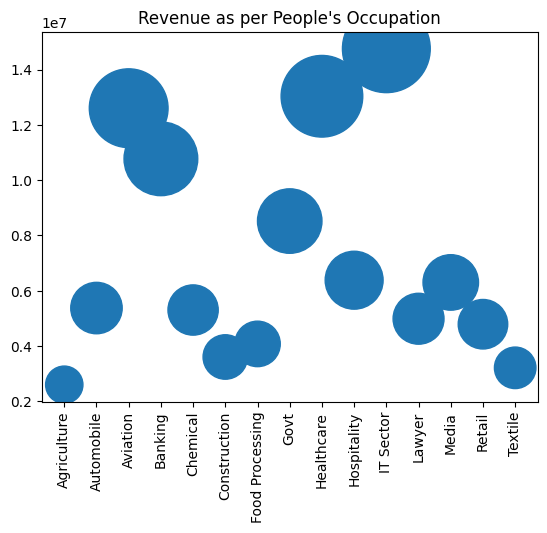

In [28]:
ptl.title("Revenue as per People's Occupation")
ptl.scatter(occupation_revenue['Occupation'],occupation_revenue['Amount'],s=occupation_revenue['Orders'])
ptl.xticks(rotation = 90)
ptl.show()

Q - Find the amount of orders and the revenue generated as per State ?

In [29]:
# !pip install plotly

In [30]:
import json
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'vscode'

In [31]:
india_states = json.load(open("C:\Data Analytics Projects\Python DA\P2\states_india.geojson",'r'))
# india_states
india_states['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[78.34088, 19.883615],
     [78.351327, 19.88184],
     [78.370422, 19.883346],
     [78.379149, 19.879733],
     [78.388848, 19.879703],
     [78.389673, 19.874372],
     [78.388883, 19.864121],
     [78.390691, 19.856213],
     [78.390645, 19.853215],
     [78.39395, 19.846705],
     [78.402384, 19.836943],
     [78.413779, 19.830435],
     [78.433447, 19.8237],
     [78.449385, 19.819844],
     [78.469482, 19.816847],
     [78.481036, 19.817011],
     [78.489156, 19.807863],
     [78.494337, 19.799196],
     [78.498808, 19.793852],
     [78.508559, 19.793125],
     [78.514515, 19.801887],
     [78.517292, 19.814976],
     [78.52413, 19.820588],
     [78.531195, 19.822351],
     [78.562889, 19.81634],
     [78.57869, 19.814543],
     [78.590001, 19.81245],
     [78.596781, 19.816171],
     [78.600308, 19.818109],
     [78.608696, 19.818273],
     [78.6194, 19.814049],
     [78.624399, 19.809511],
     [78.6

In [32]:
# creating dictionary to store state name and code
state_id = {}
for f in india_states ['features']:
    f['id'] = f['properties']['state_code']
    state_id[f['properties']['st_nm']] = f['id']
# renaming to match state name in dataset
state_id['Delhi'] = state_id['NCT of Delhi']
del state_id['NCT of Delhi']
state_id

{'Telangana': 0,
 'Andaman & Nicobar Island': 35,
 'Andhra Pradesh': 28,
 'Arunanchal Pradesh': 12,
 'Assam': 18,
 'Bihar': 10,
 'Chhattisgarh': 22,
 'Daman & Diu': 25,
 'Goa': 30,
 'Gujarat': 24,
 'Haryana': 6,
 'Himachal Pradesh': 2,
 'Jammu & Kashmir': 1,
 'Jharkhand': 20,
 'Karnataka': 29,
 'Kerala': 32,
 'Lakshadweep': 31,
 'Madhya Pradesh': 23,
 'Maharashtra': 27,
 'Manipur': 14,
 'Chandigarh': 4,
 'Puducherry': 34,
 'Punjab': 3,
 'Rajasthan': 8,
 'Sikkim': 11,
 'Tamil Nadu': 33,
 'Tripura': 16,
 'Uttar Pradesh': 9,
 'Uttarakhand': 5,
 'West Bengal': 19,
 'Odisha': 21,
 'Dadara & Nagar Havelli': 26,
 'Meghalaya': 17,
 'Mizoram': 15,
 'Nagaland': 13,
 'Delhi': 7}

In [33]:
# renaming state name to match dictionary 
df.loc[df["State"] == "Andhra\xa0Pradesh", "State"] = "Andhra Pradesh"
df['State'].unique()

array(['Maharashtra', 'Andhra Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Haryana', 'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

In [34]:
# creating a new column and mapping it with State name column
df['state_id'] = df['State'].apply(lambda x : state_id[x])
df

,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,state_id
0,Female,26-35,28,Married,Maharashtra,Western,Healthcare,Auto,1,23952,27
1,Female,26-35,35,Single,Andhra Pradesh,Southern,Govt,Auto,3,23934,28
2,Female,26-35,35,Single,Uttar Pradesh,Central,Automobile,Auto,3,23924,9
3,Male,0-17,16,Married,Karnataka,Southern,Construction,Auto,2,23912,29
4,Male,26-35,28,Single,Gujarat,Western,Food Processing,Auto,2,23877,24
...,...,...,...,...,...,...,...,...,...,...,...
11246,Male,18-25,19,Single,Maharashtra,Western,Chemical,Office,4,370,27
11247,Male,26-35,33,Married,Haryana,Northern,Healthcare,Veterinary,3,367,6
11248,Female,36-45,40,Married,Madhya Pradesh,Central,Textile,Office,4,213,23
11249,Male,36-45,37,Married,Karnataka,Southern,Agriculture,Office,3,206,29


In [35]:
state_info = df.groupby(['State','state_id'], as_index=False).agg({'Amount':'sum','Orders':'sum'})
state_info

,State,state_id,Amount,Orders
0,Andhra Pradesh,28,8037146,2051
1,Bihar,10,4022757,1062
2,Delhi,7,11603818,2740
3,Gujarat,24,3946082,1066
4,Haryana,6,4220175,1109
5,Himachal Pradesh,2,4963368,1568
6,Jharkhand,20,3026456,953
7,Karnataka,29,13523540,3240
8,Kerala,32,3894491,1137
9,Madhya Pradesh,23,8101142,2252


In [ ]:
fig = px.choropleth(state_info, 
                    locations='state_id', 
                    geojson=india_states, 
                    color='Orders', 
                    hover_name ='State',
                    hover_data = ['Amount','Orders'])
fig.update_geos(fitbounds="locations", visible=False, showcountries=True)
fig.show()
